# Where Not To Put A Store: Dodging Walmart and Crime in Dallas, TX


## Research Question

### How can we identify optimal locations for a new retail store in Dallas, avoiding direct competition with Walmart and high-crime areas with the help of GIS tools?

#### Workflow

1. Data Gathering: Collect data on Walmart locations and crime incidents in Dallas.
2. Buffer Creation: Generate influence zones around Walmart stores.
3. Crime Heatmap: Visual crime hotspots.
4. Spatial Join: Combing Walmart buffers with crime data. 
5. Data Analysis: Interpret the results to find potential store locations. 
6. Visualization: Create plots and maps to illustrate findings. 

## Data Sources 

US Walmart Store Locations: https://www.kaggle.com/datasets/jackogozaly/us-walmart-store-locations/code

Dallas Shapefile and Crime data: https://gisservices-dallasgis.opendata.arcgis.com/

#### Let's get started! 

In [1]:
#Import necessary libraries 

import pandas as pd
from arcgis.gis import GIS
from arcgis.features import FeatureLayer, FeatureLayerCollection
from arcgis.features.use_proximity import create_buffers
from arcgis.mapping import WebMap
from arcgis.features.analysis import join_features
import matplotlib.pyplot as plt
from arcgis.geocoding import geocode
overwriteOutput = True
from arcgis.gis import GIS

gis = GIS("home")  # Connect to the ArcGIS Online account

## 1. Setup and Data Loading

It's like setting the stage for a Broadway show, except the stars are datasets and the drama is in the details!

In [2]:
#Initiate a new map
dallas_map = gis.map('Dallas, TX')
dallas_map



MapView(layout=Layout(height='400px', width='100%'))

In [3]:
#Change the zoom level
dallas_map.zoom = 10

<Item title:"Dallas_lyr" type:Feature Layer Collection owner:sshahid3@slu.edu_SLUSTL>
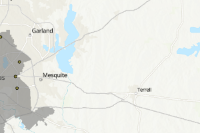

In [4]:
# Retrieve Dallas layer from the server that I previously uploaded 
dallas_fl = gis.content.get("d11f8a88d09542c5b1b0ec5bd188e09c")
dallas_fl



In [5]:
# Add the Dallas layer to the map
dallas_map.add_layer(dallas_fl)


<Item title:"WalmartStores_Dallas" type:Feature Layer Collection owner:sshahid3@slu.edu_SLUSTL>
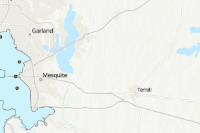

In [6]:
# Retrieve Walmart store locations layer from the server that I previously uploaded 
walmart_stores = gis.content.get('b68230b4ff604f7c8b9366b021fbe86e')
walmart_stores


In [7]:
# Add Walmart store locations layer to the map
dallas_map.add_layer(walmart_stores)

## 2. Creating Buffers 

Creating buffers around Walmart stores. It's like drawing personal space boundaries, but for stores.

In [9]:
# Create buffers around the Walmart store locations of 3-mile radius
walmart_buffer_layer = create_buffers(walmart_stores, distances=[3], units='Miles', output_name="Walmart Buffers10", gis=gis)

# Add the buffer layer to the map
dallas_map.add_layer(walmart_buffer_layer)


{"cost": 0.016}


In [13]:
# View the layer 
walmart_buffer_layer

<Item title:"Walmart_Buffers10" type:Feature Layer Collection owner:sshahid3@slu.edu_SLUSTL>

In [14]:
# Modify the symbology for the buffer layer
buffer_symbology = {
    "renderer": "simple",  # Use a simple renderer
    "symbol": {
        "type": "esriSFS",  
        "style": "esriSFSSolid",
        "color": [255, 0, 0, 75],  # Red fill with some transparency
        "outline": {
            "type": "esriSLS",
            "style": "esriSLSSolid",
            "color": [255, 255, 255, 255],  # White outline
            "width": 2
        }
    }
}

# Add the buffer layer to the map with the defined symbology
dallas_map.add_layer(walmart_buffer_layer, buffer_symbology)


<Item title:"Dallas_Crime" type:Feature Layer Collection owner:sshahid3@slu.edu_SLUSTL>
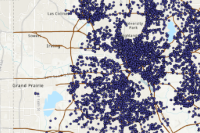

In [15]:
# Retrieve crime incidents layer from the server I previously uploaded 
crime_fl = gis.content.get('476c3ad5f2224e3a8eec185910b68a46')
crime_fl

In [16]:
#Add crime_fl layer to the map
dallas_map.add_layer(crime_fl)

## 3. Creating a Crime heatmap

Now let's light up the map with crime data. Spoiler alert: not as fun as Christmas lights.


In [17]:
#Modify the symbology of the crime_fl layer. Create a Heatmap.

crime_heatmap_renderer = {
    "renderer": "HeatmapRenderer",
    "opacity": 0.75,
    # Define color stops from low (cold) to high (hot) intensity
    "colorStops": [
        {"ratio": 0, "color": [133, 193, 200, 0]},
        {"ratio": 0.5, "color": [255, 255, 178, 255]},
        {"ratio": 0.8, "color": [252, 141, 89, 255]},
        {"ratio": 1, "color": [227, 26, 28, 255]}
    ],
    "blurRadius": 10,
    "maxPixelIntensity": 100,
    "minPixelIntensity": 0
}

# Add the heatmap to the map
dallas_map.add_layer(crime_fl, crime_heatmap_renderer)


## 4. Performing Spatial Join

Spatial joins are like setting up friends on a date. Sometimes it works, sometimes it's a disaster.

In [19]:
# Perform the spatial join to count the number of incidents under each Buffer zone 
join_result = join_features(
    target_layer=walmart_buffer_layer,   # 'walmart_buffer_layer' is the FeatureLayer for Walmart buffers
    join_layer=crime_fl,                # 'crime_fl' is the FeatureLayer for crime incidents
    join_operation="JoinOneToOne",
    spatial_relationship="Intersects",
    summary_fields=[{"statisticType": "count", "onStatisticField": "OBJECTID", "outStatisticFieldName": "crime_count"}],
    output_name="Walmart_Buffer_Crime_Join8_sjs"
)




{"cost": 10.015}


In [20]:
join_result

<Item title:"Walmart_Buffer_Crime_Join8_sjs" type:Feature Layer Collection owner:sshahid3@slu.edu_SLUSTL>

<Item title:"Walmart_Buffer_Crime_Join7_sjs" type:Feature Layer Collection owner:sshahid3@slu.edu_SLUSTL>
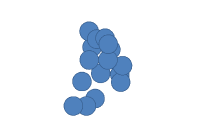

In [21]:
spatial_join_lyr = gis.content.get('505980cadbd2406ba2bd6e350272c120')
spatial_join_lyr

In [22]:
# Add the spatial join result layer to the map
dallas_map.add_layer(spatial_join_lyr)

In [23]:
from arcgis.gis import GIS, Item
from arcgis.features import FeatureLayer

# Initialize GIS - ensure you're authenticated
gis = GIS("home")

# Confirming the type of 'spatial_join_lyr'
print(type(spatial_join_lyr))

# If 'spatial_join_lyr' is an Item, access its first feature layer
if isinstance(spatial_join_lyr, Item):
    feature_layer = spatial_join_lyr.layers[0]  # Accessing the first layer

    # Now, use the query() method on the FeatureLayer object
    query_result = feature_layer.query()

    # Convert the query result to a Spatially Enabled DataFrame
    dataframe = query_result.sdf

    # Display the first few rows of the dataframe
    print(dataframe.head())
else:
    print("spatial_join_lyr is not an Item object. Please check the variable.")


<class 'arcgis.gis.Item'>
   OBJECTID  Join_Count  TARGET_FID Loc_name Status  Score Match_type  \
0         1         726           1    World      M  100.0          A   
1         2         426           2    World      M  100.0          A   
2         3         236           3    World      M  100.0          A   
3         4         889           4    World      M  100.0          A   
4         5         915           5    World      M  100.0          A   

                                        Match_addr  \
0          7401 Samuell Blvd, Dallas, Texas, 75228   
1  4122 Lyndon B Johnson Fwy, Dallas, Texas, 75244   
2             18121 Marsh Ln, Dallas, Texas, 75287   
3             200 Short Blvd, Dallas, Texas, 75232   
4             9301 Forest Ln, Dallas, Texas, 75243   

                                           LongLabel  \
0          7401 Samuell Blvd, Dallas, TX, 75228, USA   
1  4122 Lyndon B Johnson Fwy, Dallas, TX, 75244, USA   
2             18121 Marsh Ln, Dallas, TX, 

## 6. Visualizing the Results 

Time to paint a picture with our data. Picasso would be proud... or confused.


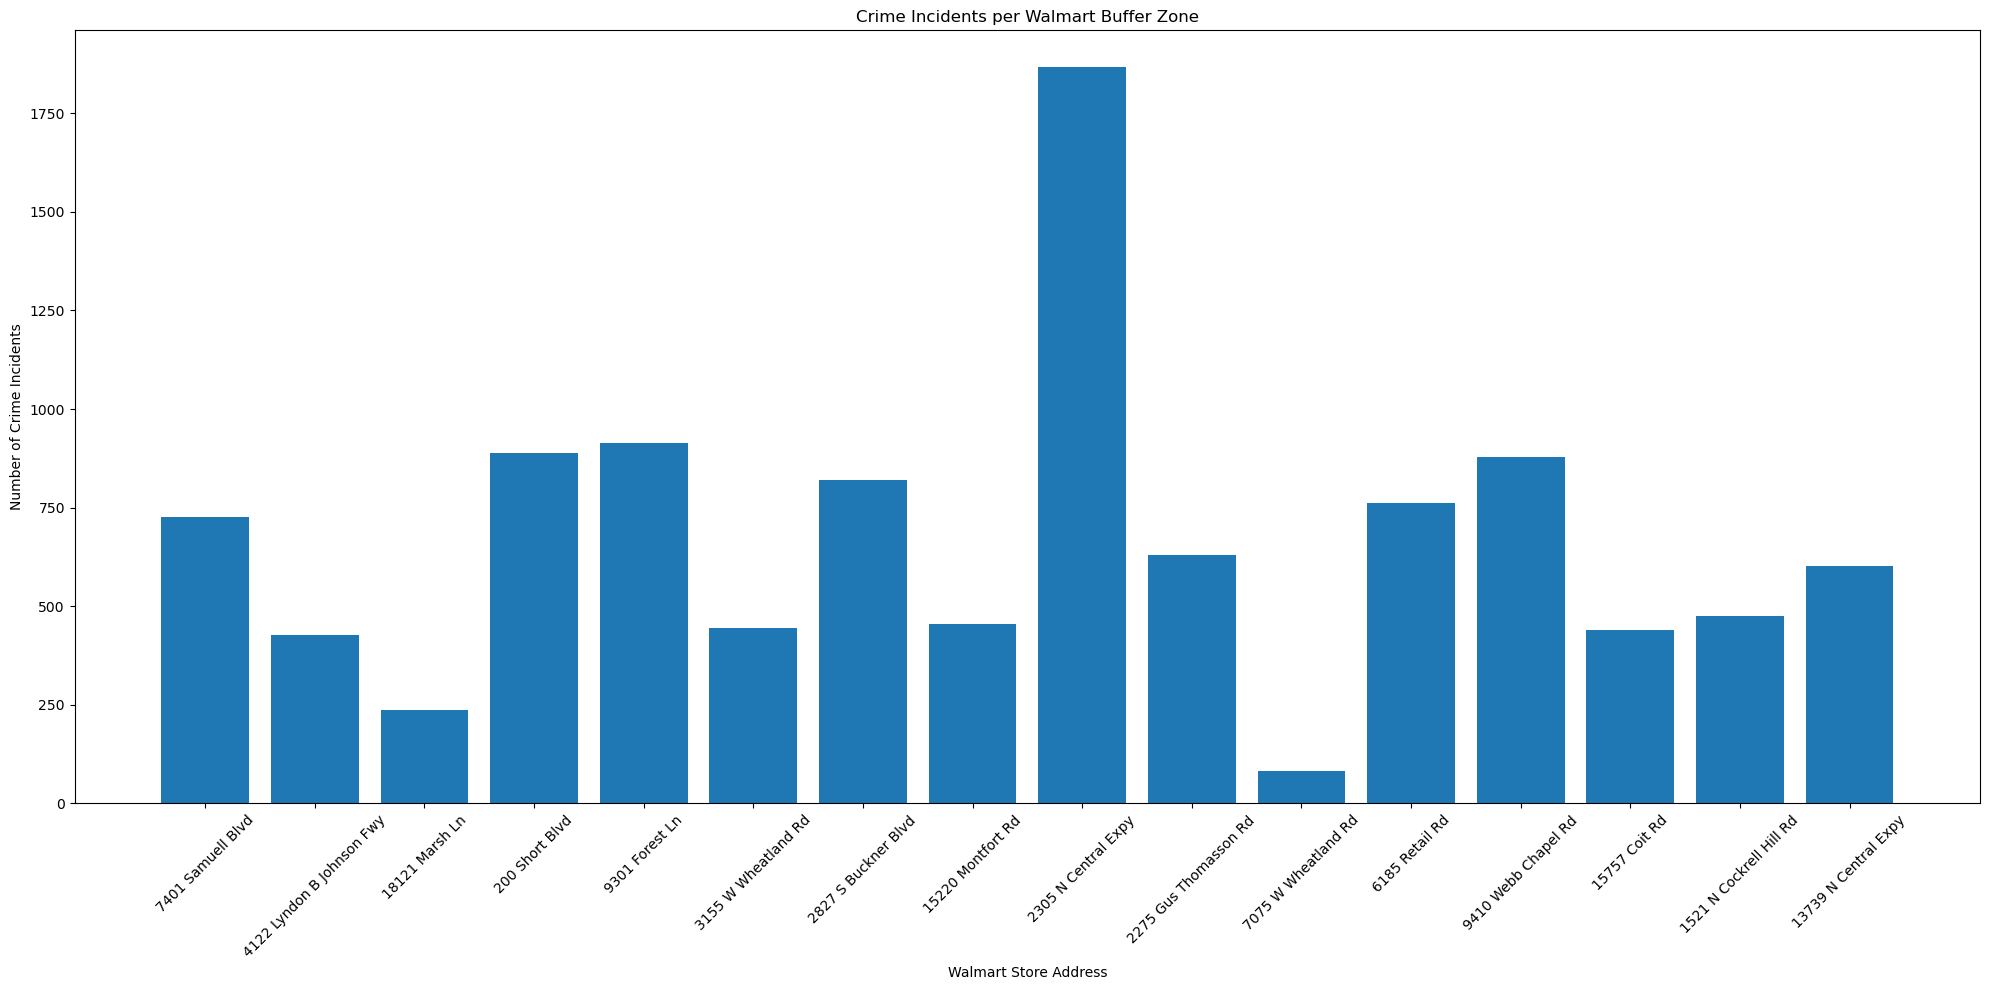

In [24]:

#Create a Plot for the number of crime under each Walmart Buffer zone. 
address = dataframe['ShortLabel']  
crime_counts = dataframe['Join_Count']

plt.figure(figsize=(20, 10))  # Increase figure size to make room for labels

# Now, plot the data
plt.bar(address, crime_counts)

# Rotate labels to make them readable
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Walmart Store Address')
plt.ylabel('Number of Crime Incidents')
plt.title('Crime Incidents per Walmart Buffer Zone')


plt.tight_layout()  # Adjust layout to fit everything
plt.show()



## 7. Conclusion and Recommendations 

#### This analysis has revealed an optimal region to open a retail store within the diverse urban tapestry of Dallas. The southeast region of Dallas, a locale rich with dynamic communities and untapped market potential, stands out as an ideal candidate for new retail endeavors. Through careful spatial analysis that strategically avoided areas heavily influenced by Walmart and those with higher crime rates, we have identified this region as a promising zone for retail expansion. It presents itself as a rare opportunity in the bustling landscape of Dallas, akin to a niche market awaiting discovery.



### Recommendations

#### In-Depth Analysis of Southeast Dallas: Considering its promise, a more detailed analysis of Southeast Dallas is advisable. This should include an assessment of individual neighborhoods, focusing on aspects such as pedestrian traffic, ease of access, and the current retail environment.

#### Incorporate Neighborhood and Population Data: This analysis encountered limitations due to the absence of open-source neighborhood and population data. Integrating these data sets in the future would refine our insights, enabling a deeper understanding of the local demographic profile, spending capacity, and consumer patterns.

#### Local Market Research: Ground-level market research is invaluable. Engaging in direct surveys and focus groups within Southeast Dallas could provide rich qualitative insights that complement our quantitative data.

#### Monitor Crime Data Trends: Urban safety dynamics can change rapidly. Keeping the crime data updated is essential to ensure that the chosen locations continue to be viable and safe.

#### Future Data Integration: If open-source data on neighborhoods and populations becomes available, it would be prudent to re-evaluate our analysis. Such data could lead to more precise identification of optimal retail locations.

#### In summary, while Southeast Dallas emerges as a frontrunner in our study, the roadmap to successful retail establishment demands further data acquisition, local market insights, and an adaptable approach that considers the evolving nature of consumer behavior and the impact of digital commerce. The journey to retail success is an ongoing one, and we are poised to adapt and evolve with the changing market landscape.